# "Trends on Trends" - An Analysis of Youtube Trending Videos


This project will explore how the Youtube creator and other viewers affect the path from viewer to view, within the Youtube platform (excluding outside factors). 

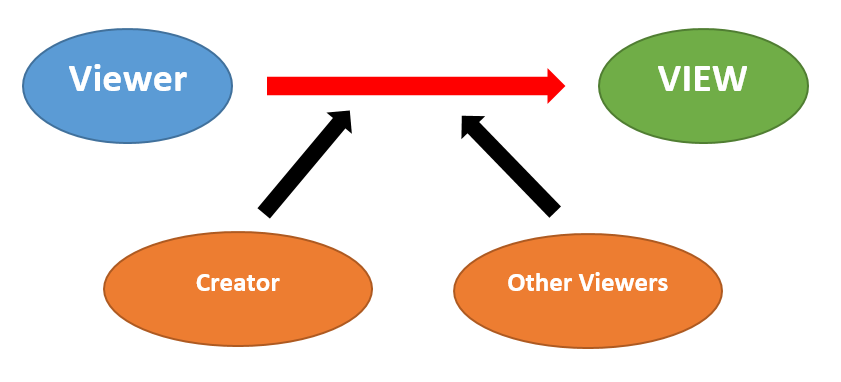

In [16]:
from IPython.display import Image
Image(filename='Youtube Relationship - Diagram.PNG') 


## QUESTIONS TO EXPLORE

### * Are there any patterns that can predict video trendability? 
### * Whose actions correlate with trendability (creator, viewer, platform)?
### * Based on data, any areas Youtube should focus on supporting?

## WHAT MAKES THE BIGGEST DIFFERENCE?

### Effect of Time
### Effect of Content!!!
### Channel Demographics
### Effect of Viewer Feedback

## DATA BACKGROUND & PREVIEW

### What data is available?
* "Daily Record of the Top Trending Youtube Videos"
* Up to 200 trending videos per day
* Two dataframes with the same columns (19). 'df' contains one line per video with final numbers while "df_all_timestamps" contains snapshots throughtout the day. 

### Limitations
* No data on the viewers or path to arrive to video. 

### Questions
* What defines trending? 

### Manipulations

DF
* Added tag_count column (which split the string in the tags column and added the individual elements)
* Replaced existing publish date column with data type "object" with new one with data type "datestime"
* Replaced existing trending date column with data type "object" with new one with data type "datetime"
* Added publish day of the week column

OTHERS
* Dataframe channel_count created for Multiple Trenders analysis

In [72]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

datapath1 = os.path.join('..',filename1)
datapath2 = os.path.join('..',filename2)

In [15]:
df = pd.read_csv(datapath1)
df_all_timestamps = pd.read_csv(datapath2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


In [8]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


In [46]:
# converting date field

def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = pd.to_datetime(df_all_timestamps['string_date_time'], infer_datetime_format=True, errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = pd.to_datetime(df['string_date_time'], infer_datetime_format=True, errors='coerce')
df = df.drop('string_date_time', axis=1)

In [256]:
# made new column called trending_timestamp converting trending date object to datetime

df.loc[:,'trending_timestamp'] = pd.to_datetime(df['trending_date'], infer_datetime_format=True, errors='coerce')

In [259]:
df = df.drop('trending_date', axis=1)

In [254]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [260]:
df.head()

,video_id,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count,trending_timestamp
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44,2017-11-14
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9,2017-11-14
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8,2017-11-14
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22,2017-11-14
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6,2017-11-14


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 25 columns):
video_id                  171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               0 non-null object
country                   171149 non-null object
log_views              

In [51]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10 17:00:03
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33


## EFFECT OF DEMOGRAPHICS

Where a channel is located may have an effect on trendability???? We can see in this section that most trending videos come from select countries, but we don't have enough properties to understand the reason behind it or give any insights. 

### Findings / Of Notice
* FASDF..

### Business Insight
* FASDFS

### Further Study Needed
* fSDFLdsf.


### ••• COUNTRY •••

In [27]:
country_count = df['country'].value_counts()
print(country_count)

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

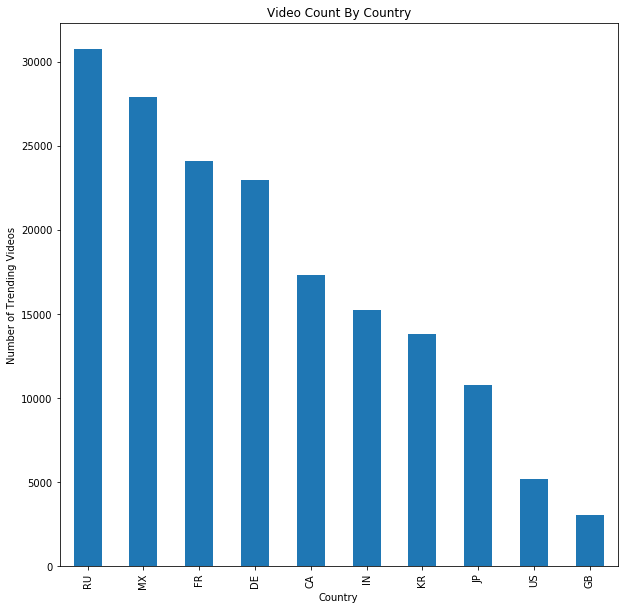

In [17]:
# Bar plot of country

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
country_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis


# FINDINGS
# Russia, Mexico, and France are the top 3 origins of most trending videos

Text(0, 0.5, 'Views')

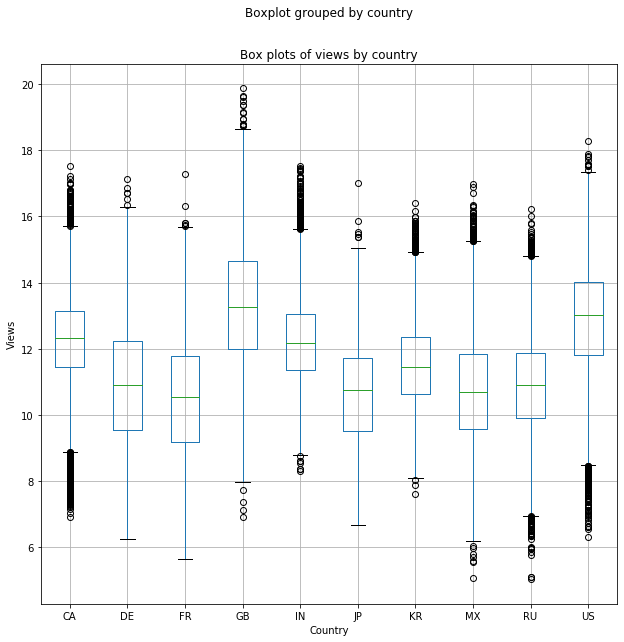

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
df[['log_views','country']].boxplot(by = 'country', ax = ax)
ax.set_title('Box plots of views by country')
ax.set_xlabel('Country')
ax.set_ylabel('Views')

# What is e?  to the 6th power 

## EFFECT OF CONTENT

The Youtube Creator has a lot of control over the properties of the channel and video. The following properties are either manually entered by the creator OR are generated from a result of an action by the creator: Title, Description, Thumbnail, Tags, Category, Video Location (country), Comments Disabled, Ratings Disabled, Publish Date, and Publish Time.

This section will explore if the properties that stem from the creator have any correlation with trendability. 

### Findings / Of Notice
* FASDF..

### Business Insight
* FASDFS

### Further Study Needed
* fSDFLdsf.


### ••• CATEGORY ••• (COMPLETE)

* Category is subjectively chosen by the creator. 
* Although 'Entertainment' is the most popular category, a closer looks shows that it is used broadly instead of better matching categories
* With this in mind, is a better solution to make categories more descriptive for Youtube OR should the creator play around this?
* If 'Entertainment' videos trend better and assuming category is used in suggestion algorithms, the Youtube creator should consider if he/she would prefer to use a wider category that may reach more people but might not fit what the viewer is looking for OR if they prefer to select the category that better matches their video, targets less viewers, is less competitive, and perhaps it is more relevant to what the viewer is looking for. 

In [25]:
category_count = df['category'].value_counts()
print(category_count)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

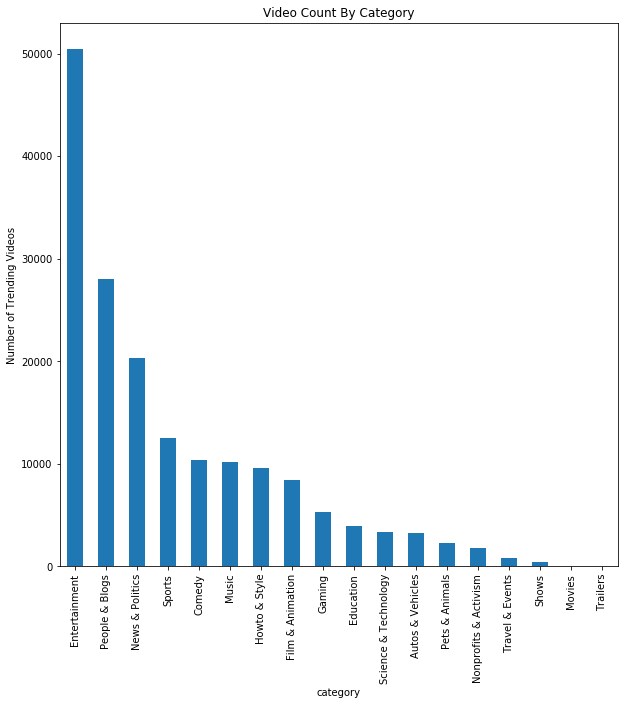

In [297]:
# Bar plot per category

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
category_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Category') # Give the plot a main title
ax.set_xlabel('category') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis



In [69]:
# Is Entertainment category more popular OR is it used very leniently, based on US?
# Qualitative Assessment
# Checking US top 5 and bottom 5, you can see a movie trailer miscategorized as entertainment (675)
# It also seems to be a catch all of hard-to-categorize videos such as #666 (Shows, People and Blogs, News)

entertainment = df['category'] == 'Entertainment'
US = df['country'] == 'US'
df[entertainment & US]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
322,zYWt2mnalP8,2017-11-14,How To Do Thanksgiving Makeup That Has Nothing...,Sailor J,24,Entertainment,2017-11-08,00:03:47,"Thanksgiving|""Tutorial""|""Makeup""",160477,8388,691,950,https://i.ytimg.com/vi/zYWt2mnalP8/default.jpg,False,False,False,Center for American Indian Research & Native S...,US,11.985912,9.034677,6.539586,6.857514,2017-11-08 00:03:47
666,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...,US,14.219321,9.648918,5.869297,6.989335,2017-11-10 09:35:00
672,F-j_6IuaYfw,2017-11-14,I Miss the Old Taylor,Wong Fu Productions,24,Entertainment,2017-11-08,21:05:20,"taylor swift|""swiftie""|""reputation""|""ready for...",476389,16106,950,2077,https://i.ytimg.com/vi/F-j_6IuaYfw/default.jpg,False,False,False,A new Taylor Swift is upon us! Some people jus...,US,13.073992,9.687009,6.857514,7.639161,2017-11-08 21:05:20
674,Y6eKxjMA9ek,2017-11-14,"Dropping And CATCHING A Paper Airplane At 2,00...",Tucker Gott,24,Entertainment,2017-11-09,16:00:09,"paramotor|""tucker""|""gott""|""tucker gott""|""param...",175852,15909,200,852,https://i.ytimg.com/vi/Y6eKxjMA9ek/default.jpg,False,False,False,After failing the paper airplane drop a few ye...,US,12.077404,9.674703,5.303305,6.748760,2017-11-09 16:00:09
675,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,US,12.844634,8.638171,4.990433,6.516193,2017-11-09 09:00:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169876,vRWH9GQ2J90,2018-06-14,100 LAYERS OF DEEP FRIED PIZZA 🍕CHALLENGE!!!,HellthyJunkFood,24,Entertainment,2018-06-03,14:22:17,"100 layers|""pizza""|""100 layers of pizza""|""deep...",1083920,20667,4067,4327,https://i.ytimg.com/vi/vRWH9GQ2J90/default.jpg,False,False,False,Download Fortnite! https://pixly.go2cloud.org/...,US,13.896096,9.936342,8.310907,8.372861,2018-06-03 14:22:17
169878,n-DTjpde9-0,2018-06-14,"Spinning a Record to Pieces at 12,500fps - The...",The Slow Mo Guys,24,Entertainment,2018-06-02,21:42:35,"slomo|""slow""|""mo""|""super""|""motion""|""Slow Motio...",4265963,99964,2231,7731,https://i.ytimg.com/vi/n-DTjpde9-0/default.jpg,False,False,False,Gav and Dan take 1 piece of vinyl and spin it ...,US,15.266179,11.512575,7.710653,8.953123,2018-06-02 21:42:35
169879,UTVpWVO4vZU,2018-06-14,SIDEMEN FC VS YOUTUBE ALLSTARS 2018 (Goals & H...,Sidemen,24,Entertainment,2018-06-02,20:00:23,"sidemen|""sidemen fc""|""youtube allstars""|""sidem...",7177740,172730,9205,20840,https://i.ytimg.com/vi/UTVpWVO4vZU/default.jpg,False,False,False,DONATE HERE: http://bit.ly/DonateSDMNSuperchat...,US,15.786495,12.059491,9.127611,9.944677,2018-06-02 20:00:23
169885,t_bnyOOFDNM,2018-06-14,COLLEGE KIDS REACT TO ROSEANNE CANCELED?! (Twi...,FBE,24,Entertainment,2018-06-01,21:00:02,"roseanne twitter controversy|""roseanne cancell...",1255834,21773,3880,18299,https://i.ytimg.com/vi/t_bnyOOFDNM/default.jpg,False,False,False,The Roseanne Twitter controversy discussed by ...,US,14.043311,9.988472,8.263848,9.814656,2018-06-01 21:00:02


### ••• DESCRIPTION ••• (COMPLETE)

No insight as all videos have a description

In [82]:
no_description = df['description'] == None
df[no_description]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp


### ••• TAGS ••• (COMPLETE)

* Tag count does not directly correlate with views but we can see patterns on how many tags 'trending' views tend to have. 
* Assuming tags factor into Youtube search algorithms, we can make recommendations on tag_count.
* The average tag count of trending videos is 17 and it should be kept within 7 and 25 (the range followed by 50% of trending videos). Every trending video has at least 1 so it should be not left blank.


In [139]:
# every video has tags

no_tags = df['tags'] == None
df[no_tags]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count


In [140]:
# make new column called tag_count

df['tag_count'] = None

In [143]:
# put data into the column

df['tag_count'] = df['tags'].str.split(r'|')
df.loc[:,'tag_count'] = df['tag_count'].apply(lambda x: len(x))
        

In [152]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6


Text(0, 0.5, 'Views')

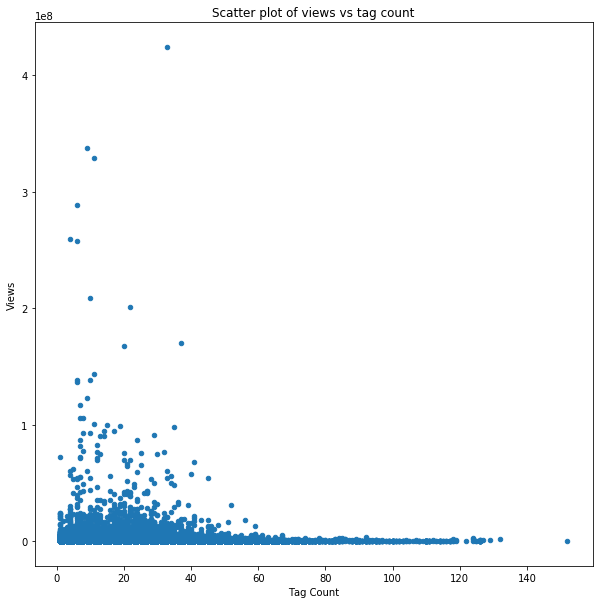

In [147]:
# Tag count vs views

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'tag_count', y = 'views', ax = ax)
ax.set_title('Scatter plot of views vs tag count')
ax.set_xlabel('Tag Count') 
ax.set_ylabel('Views')

In [151]:
df['tag_count'].describe()

count    171149.000000
mean         17.148222
std          13.284787
min           1.000000
25%           7.000000
50%          15.000000
75%          25.000000
max         152.000000
Name: tag_count, dtype: float64

### ••• OPENNESS TO FEEDBACK (COMMENTS & RATINGS) •••  (COMPLETE)

* The grand majority of videos are open to feedback with 98% open to comments and 98% open to ratings
* Less than 1 percent (0.67%) are closed to both ratings and comments. 
* For Youtube creators: it is important to note that trending videos overwhelming tend to be open to feedback and if trendability/popularity is the goat, their videos should follow this pattern.

In [179]:
# open to comments? - count

comments_disabled_count = df['comments_disabled'].value_counts()
print(comments_disabled_count)

False    167027
True       4122
Name: comments_disabled, dtype: int64


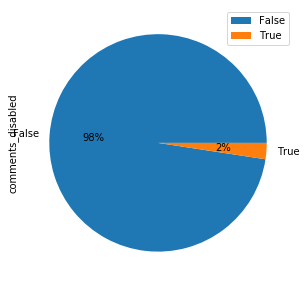

In [180]:
# open to comments? - proportion

df2 = pd.DataFrame(comments_disabled_count)
plot = df2.plot.pie(y='comments_disabled', figsize=(5, 5), autopct='%1.0f%%')

In [181]:
# open to ratings? - count

ratings_disabled_count = df['ratings_disabled'].value_counts()
print(ratings_disabled_count)

False    167159
True       3990
Name: ratings_disabled, dtype: int64


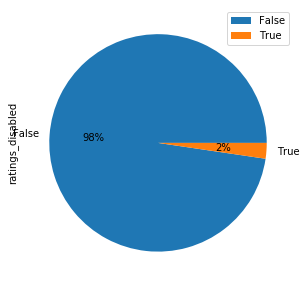

In [182]:
# open to ratings? - proportion

df3 = pd.DataFrame(ratings_disabled_count)
plot = df3.plot.pie(y='ratings_disabled', figsize=(5, 5), autopct='%1.0f%%')

In [212]:
# What is the overlap? Closed to both comments are ratings. 

df4 = df[(df.ratings_disabled == True) & (df.comments_disabled == True)]

len(df4)

1153

In [214]:
# closed videos / total videos
# as a percentage

(len(df4)/len(df))*100

0.6736819963891113

## EFFECT OF TIME

..

### Findings / Of Notice
* FASDF..

### Business Insight
* FASDFS

### Further Study Needed
* fSDFLdsf.


### ••• PUBLISH DATE ••• (almost)

* Publish date is generated when the Creator uploads the video and hence in his control.
* The day of the week is pretty evenly split so the difference between days is not drastic. However... when placed in video count order, there seems to be a preference and/or strategic decision to publish on weekdays (Saturday and Sunday had the least amount)
* Friday is the most popular day to publish, perhaps getting ahead of the weekend?

In [266]:
df['publish_day'] = None

In [319]:
df['publish_day'] = df['publish_timestamp'].dt.dayofweek

In [316]:
df.head(50)

,video_id,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count,trending_timestamp,publish_day,trending_day
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44,2017-11-14,6,1
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9,2017-11-14,6,1
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8,2017-11-14,6,1
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22,2017-11-14,0,1
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6,2017-11-14,0,1
5,k0OruM7tneA,الإعلام المصري : شكون فالمنتخبات العربية لي ...,AR-EN-FR LANGUAGES,17,Sports,2017-11-13,12:08:26,"المنتخب""|""المغربي""|""دخل""|""التاريخ""|""وهو""|""أول""...",48650,486,69,238,https://i.ytimg.com/vi/k0OruM7tneA/default.jpg,False,False,False,None,FR,10.792428,6.188264,4.248495,5.476464,2017-11-13 12:08:26,30,2017-11-14,0,1
6,z4PWAu9HfxM,No hablo (Vidéoclip),Thomas Gauthier,23,Comedy,2017-11-12,17:30:01,"TomliTV""|""deuxième""|""channel""|""vlogs""|""Thomas""...",38245,6849,27,332,https://i.ytimg.com/vi/z4PWAu9HfxM/default.jpg,False,False,False,None,FR,10.551794,8.832004,3.332205,5.808142,2017-11-12 17:30:01,24,2017-11-14,6,1
7,4HeOSihd32A,LES GAMERS [Version intégrale] - Les Reportage...,ERTV Officiel,25,News & Politics,2017-11-13,14:31:33,"Gaming""|""gamers""|""Vincent Lapierre""|""jeux vidé...",14854,774,34,118,https://i.ytimg.com/vi/4HeOSihd32A/default.jpg,False,False,False,None,FR,9.606092,6.652863,3.555348,4.779123,2017-11-13 14:31:33,9,2017-11-14,0,1
8,_wChN4yabJM,DALS S08 - Lenni-Kim danse un Tango avec Denit...,Danse avec les stars,24,Entertainment,2017-11-13,12:00:02,"Lenni-Kim""|""Denitsa Ikonomova""|""tango""|""Justin...",19004,618,4,44,https://i.ytimg.com/vi/_wChN4yabJM/default.jpg,False,False,False,None,FR,9.852457,6.428105,1.609438,3.806662,2017-11-13 12:00:02,19,2017-11-14,0,1
9,3KvSVqN43t0,"VOL, BAGARRE ET CRACHAT - Draw My Life",Jeel,20,Gaming,2017-11-12,22:18:05,"Jeel""|""Eclypsia""|""Gaming""|""Jeux Vidéo""|""EC Jee...",17255,1581,13,195,https://i.ytimg.com/vi/3KvSVqN43t0/default.jpg,False,False,False,None,FR,9.755915,7.366445,2.639057,5.278115,2017-11-12 22:18:05,21,2017-11-14,6,1


In [320]:
publish_day_count = df['publish_day'].value_counts()
print(publish_day_count)

4    26978
3    25624
0    24920
1    23992
2    23868
6    23233
5    22534
Name: publish_day, dtype: int64


In [321]:
def dayofweek(row):
    if row['publish_day'] == 0:
        return 'Monday'
    elif row['publish_day'] == 1:
        return 'Tuesday'
    elif row['publish_day'] == 2:
        return 'Wednesday'
    elif row['publish_day'] == 3:
        return 'Thursday'
    elif row['publish_day'] == 4:
        return 'Friday'
    elif row['publish_day'] == 5:
        return 'Saturday'
    elif row['publish_day'] == 6:
        return 'Sunday'

df.loc[:,'publish_day'] = df.apply(dayofweek, axis=1)

df.head()

,video_id,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count,trending_timestamp,publish_day,trending_day
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44,2017-11-14,Sunday,1
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9,2017-11-14,Sunday,1
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8,2017-11-14,Sunday,1
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22,2017-11-14,Monday,1
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6,2017-11-14,Monday,1


In [322]:
publish_day_count = df['publish_day'].value_counts()
print(publish_day_count)

Friday       26978
Thursday     25624
Monday       24920
Tuesday      23992
Wednesday    23868
Sunday       23233
Saturday     22534
Name: publish_day, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

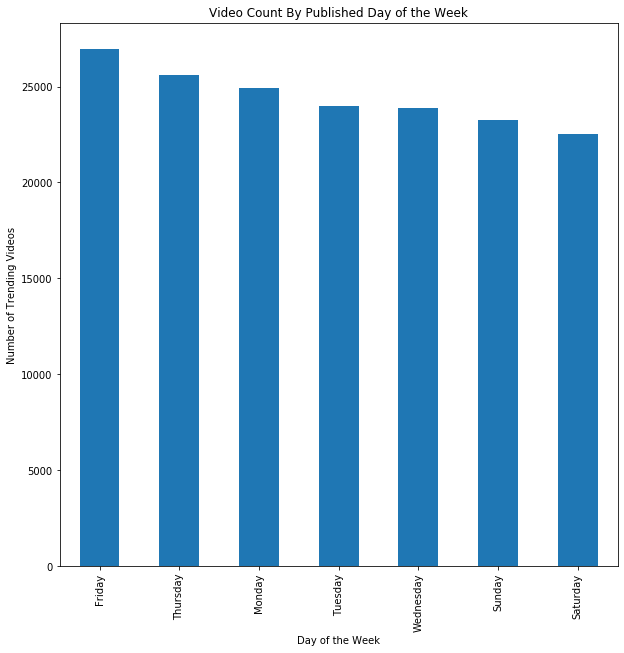

In [323]:
# Bar Plot by Publish Date of the week 
# 0 = Mon, 1 = Tues, 2 = Wed, 3 = Thurs, 4 = Fri, 5 = Sat, 6 = Sun

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
publish_day_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Published Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Trending Videos')

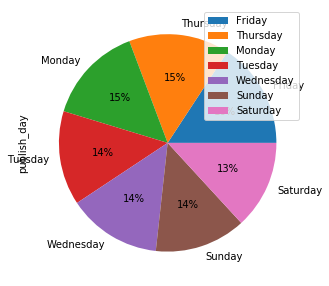

In [324]:
df5 = pd.DataFrame(publish_day_count)
plot = df5.plot.pie(subplots = True, figsize=(5, 5), autopct='%1.0f%%')

### ••• TRENDING DATE •••

* The day of the week is pretty evenly split so the difference between days is not drastic. However... when placed in video count order, there seems to be trend that videos are least likely to reach trending on Sunday and Monday which seems to be in line with videos being less likely to be published Saturday and Sunday. 
* Tuesday was the most popular day for a video to reach trending. Does this say anything about suggested patterns for creators? 

In [298]:
# added column for trending day of the week

df['trending_day'] = None
df['trending_day'] = df['trending_timestamp'].dt.dayofweek
df.head()

,video_id,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count,trending_timestamp,publish_day,trending_day
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44,2017-11-14,6,1
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9,2017-11-14,6,1
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8,2017-11-14,6,1
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22,2017-11-14,0,1
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6,2017-11-14,0,1


In [299]:
trending_day_count = df['trending_day'].value_counts()
print(trending_day_count)

1    25968
4    25095
3    24971
2    24648
5    24479
0    23033
6    22955
Name: trending_day, dtype: int64


In [325]:
def dayofweek(row):
    if row['trending_day'] == 0:
        return 'Monday'
    elif row['trending_day'] == 1:
        return 'Tuesday'
    elif row['trending_day'] == 2:
        return 'Wednesday'
    elif row['trending_day'] == 3:
        return 'Thursday'
    elif row['trending_day'] == 4:
        return 'Friday'
    elif row['trending_day'] == 5:
        return 'Saturday'
    elif row['trending_day'] == 6:
        return 'Sunday'

df.loc[:,'trending_day'] = df.apply(dayofweek, axis=1)

df.head()

,video_id,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count,trending_timestamp,publish_day,trending_day
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44,2017-11-14,Sunday,Tuesday
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9,2017-11-14,Sunday,Tuesday
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8,2017-11-14,Sunday,Tuesday
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22,2017-11-14,Monday,Tuesday
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6,2017-11-14,Monday,Tuesday


In [326]:
trending_day_count = df['trending_day'].value_counts()
print(trending_day_count)

Tuesday      25968
Friday       25095
Thursday     24971
Wednesday    24648
Saturday     24479
Monday       23033
Sunday       22955
Name: trending_day, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

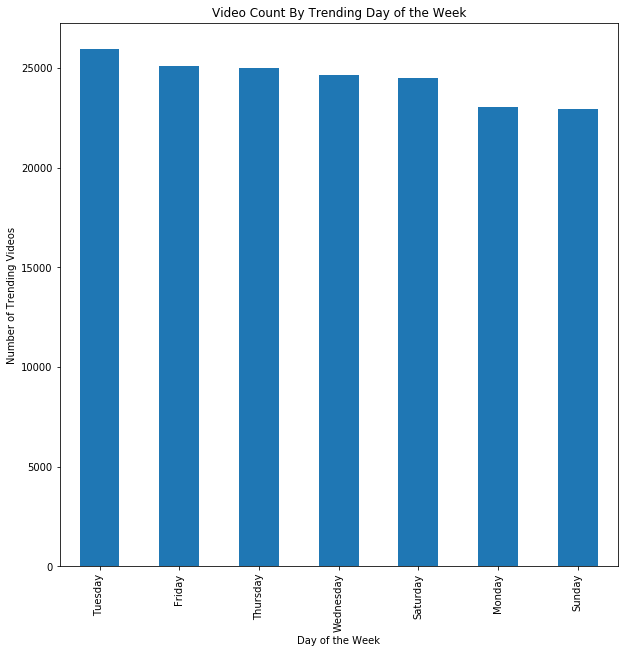

In [327]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
trending_day_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Trending Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Trending Videos')

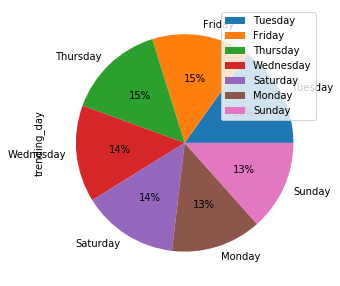

In [328]:
df6 = pd.DataFrame(trending_day_count)
plot = df6.plot.pie(subplots = True, figsize=(5, 5), autopct='%1.0f%%')

### ••• DAYS ON THE PLATFORM ••• 

* FASDF;L

### ••• MULTIPLE TRENDERS ••• (COMPLETE)

* If you aggregate the total number of videos trending by channel, almost 50% of those channels had more than one video trending. 
* Viewers tend to see videos from the same channel close to each other OR presumably, this property feeds into suggestion algorithms and viewers that see 1 video from a channel may be suggested to see another. 
* This presents an opportunity for the Youtube Creator to have more than one video trending at the moment and for Youtube to encourage more trending videos. 
* If a Creator achieves trending with 1 video, two things may happen: there seems to be a correlation that either one of his/her existing videos can increase in viewership rapidly OR if the creator posts another video soon after, that new video may benefit from the popularity of the previous. 
* Assuming the creator does not proactively see this connection, Youtube (who is most likely already suggesting to viewers to see videos from the same channel) may now encourage via prompts or incentives more video uploads in a short period of time from the same creator to build on momentum

In [235]:
channel_count_series = df['channel_title'].value_counts()
print(channel_count_series)

SET India                                        253
SAB TV                                           248
VikatanTV                                        240
The Late Show with Stephen Colbert               230
Анатолий Шарий                                   224
                                                ... 
Johnny КИТАЙ                                       1
Abnormal Tuber                                     1
LAmobile - аксессуары для мобильных устройств      1
뜸나                                                 1
ВИD osiks news                                     1
Name: channel_title, Length: 33965, dtype: int64


In [236]:
channel_count_series.describe()

count    33965.000000
mean         5.038981
std         12.047872
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        253.000000
Name: channel_title, dtype: float64

In [240]:
channel_count = pd.DataFrame(df.channel_title.value_counts().reset_index().values, columns=["channel_title", "VideoCount"])
channel_count

,channel_title,VideoCount
0,SET India,253
1,SAB TV,248
2,VikatanTV,240
3,The Late Show with Stephen Colbert,230
4,Анатолий Шарий,224
...,...,...
33960,Johnny КИТАЙ,1
33961,Abnormal Tuber,1
33962,LAmobile - аксессуары для мобильных устройств,1
33963,뜸나,1


In [248]:
multiple_trender = channel_count['VideoCount'] >1
channel_count[multiple_trender]

,channel_title,VideoCount
0,SET India,253
1,SAB TV,248
2,VikatanTV,240
3,The Late Show with Stephen Colbert,230
4,Анатолий Шарий,224
...,...,...
16399,れーと先生RATE VFX,2
16400,Сергей Зимин,2
16401,Freiheit im Glück,2
16402,Sports Archivist 2017,2


In [253]:
# From the channels with trending videos, almost 50% are concurrently trending more than one video

# From Previous calculations
Total_VideoCount_DF = 171149          # df.describe()
Total_ChannelCount_DF = 33965         # channel_count_series.describe()
Multiple_TrenderCount_Df = 16404      # multiple_trender view

Multiple_TrenderCount_Df/Total_ChannelCount_DF

0.48296776093036947

## EFFECT OF FEEDBACK

Viewers can now interact with the platform and provide limited feedback on a video, wnen allowed by the creator. The following properties are a result of actions from the viewer community: comments, likes, and dislikes. Views and trending_date are not included here as these are the desired result that define success. 

This section will explore if the properties that stem from viewers have any correlation with trendability.

### Findings / Of Notice
* FASDF

### Business Insight
* FASDFS

### Further Study Needed

Note, this project only includes total select properties; there is no assessment on who gets drawn to a video and how. This section only explores if feedback within the platform has an effect and/or can predict trendability 